In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


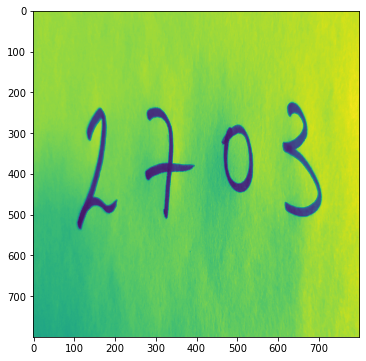

In [17]:
# import image to be used
pic = cv2.imread('alessio.jpg')
grey_img = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
grey_img = cv2.resize(grey_img,(800,800))
plt.figure(figsize = (8,6))
plt.imshow(grey_img)

In [18]:
# crop picture to show just where the numbers are
#crop = pic[1500:2100,300:2300]
#grey_img = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
grey_img = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
#cv2.imshow('crop', crop)
#cv2.waitKey(0) 
#cv2.destroyAllWindows() 

# transform picture into required format of white writing and black background
ret, threshold = cv2.threshold(grey_img, 90, 255, cv2.THRESH_BINARY_INV)
#cv2.imshow('threshold', threshold)
#cv2.waitKey(0) 
#cv2.destroyAllWindows() 

4


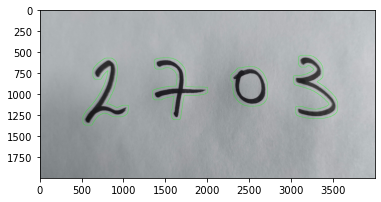

In [19]:
# use opening to method to get rid of white dots (erosion) and then increasing whiteness in the numbers (dilation)
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)

# and then dilation again to increase white thickness in the numbers
dilate = cv2.dilate(opening,kernel, iterations=15)
#cv2.imshow('dilate', dilate)
#cv2.waitKey(0) 
#cv2.destroyAllWindows()

# repeat same procedure to get rid of more noise
opening2 = cv2.morphologyEx(dilate, cv2.MORPH_OPEN, kernel)
dilate2 = cv2.dilate(opening2,kernel, iterations=15)

# find the contours
contours, heirachy = cv2.findContours(dilate2,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

#check length of contours to see how much noise has been removed
print(len(contours))

# draw the contours
#image = crop.copy()
image = pic.copy()
cv2.drawContours(image, contours,-1, (0,255,0),2)
plt.imshow(image)
#cv2.imshow('contours', image)
#cv2.waitKey(0) 
#cv2.destroyAllWindows() 

In [20]:
#function to sort contours in decending order
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# calling the function
cnts, bboxs = sort_contours(contours)
print(len(cnts))

4


In [21]:
# create lists for x,y w and h
xss = []
yss = []
wss = []
hss = []
for i in cnts:
    (xs, ys, ws, hs) = cv2.boundingRect(i)
    if (ws >= 0) and (hs >= 100):
        xss.append(xs)
        yss.append(ys)
        wss.append(ws)
        hss.append(hs)
        i+=1

In [22]:
# crop picture to get each number separately
ind_numbers = []
#cropped = crop.copy()
cropped = pic.copy()
for x,y,w,h in zip(xss,yss,wss,hss):
    one = cropped[y:y+h, x:x+w]
    ind_numbers.append(one)

In [23]:
# function to preprocess the images
def preproc(img):
    #convert pics to greyscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #resize
    gray_img = cv2.resize(gray_img,(28,28))

    #change colour using otsu
    ret, otsu = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)
    #return plt.imshow(otsu, cmap = 'gray')
    return otsu

In [24]:
#preprocess the images
numbers = []
for i in ind_numbers:
    clean = preproc(i)
    numbers.append(clean)

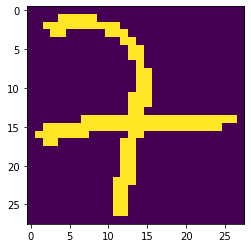

In [25]:
plt.imshow(numbers[1])#, cmap = 'gray')

In [27]:
#saving alessio images
cv2.imwrite('nums_al/two.png',numbers[0])
cv2.imwrite('nums_al/seven.png',numbers[1])
cv2.imwrite('nums_al/zero.png',numbers[2])
cv2.imwrite('nums_al/three.png',numbers[3])

True

In [11]:
# saving images to files
cv2.imwrite('nums/one.png',numbers[0])
cv2.imwrite('nums/seven.png',numbers[1])
cv2.imwrite('nums/six.png',numbers[2])
cv2.imwrite('nums/two.png',numbers[3])
cv2.imwrite('nums/eight.png',numbers[4])
cv2.imwrite('nums/nine.png',numbers[5])

True